In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
df_ser = pd.read_csv("C:\\Users\\admin\\Documents\\police_department_analysis\\police-department-calls-for-service.csv")

In [88]:
df_inc = pd.read_csv("C:\\Users\\admin\\Documents\\police_department_analysis\\police-department-incidents.csv")
#print(lon_lan)

In [210]:
df_ser['date_calls'] = pd.to_datetime(df_ser['Call Date Time'])
df_ser['year_calls'] = df_ser['date_calls'].dt.year
df_ser['month_calls'] = df_ser['date_calls'].dt.month
df_ser['day_calls'] = df_ser['date_calls'].dt.day
df_ser['weekday_calls'] = df_ser['date_calls'].dt.weekday
df_ser['hours'] = df_ser['date_calls'].dt.hour
df_ser['n_calls'] = 1
df_ser = df_ser.drop(['date_calls','Call Date Time'],axis = 1)


In [211]:
df_ser.head(10)

,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location,year_calls,month_calls,day_calls,weekday_calls,hours,n_calls
0,160942891,Muni Inspection,2016-04-03T00:00:00,2016-04-03T00:00:00,2016-04-03T00:00:00,18:15,Not recorded,900 Block Of Ulloa St,San Francisco,CA,1,Common Location,"West Portal Muni, Sf",2016,4,3,6,18,1
1,160930487,913,2016-04-02T00:00:00,2016-04-02T00:00:00,2016-04-02T00:00:00,03:55,HAN,Folsom St/13th St,San Francisco,CA,1,Intersection,NaN,2016,4,2,5,3,1
2,160941602,Passing Call,2016-04-03T00:00:00,2016-04-03T00:00:00,2016-04-03T00:00:00,11:49,HAN,2900 Block Of Taylor St,San Francisco,CA,1,Common Location,"Fishermans Wharf, Sf",2016,4,3,6,11,1
3,160922392,Passing Call,2016-04-01T00:00:00,2016-04-01T00:00:00,2016-04-01T00:00:00,16:09,Not recorded,1100 Block Of Market St,San Francisco,CA,1,Common Location,"Civic Center Muni, Sf",2016,4,1,4,16,1
4,160923170,Threats / Harassment,2016-04-01T00:00:00,2016-04-01T00:00:00,2016-04-01T00:00:00,19:11,NOM,26th Av/geary Bl,San Francisco,CA,1,Intersection,NaN,2016,4,1,4,19,1
5,160921127,Rep,2016-04-01T00:00:00,2016-04-01T00:00:00,2016-04-01T00:00:00,10:08,HAN,300 Block Of Bryant St,San Francisco,CA,1,Premise Address,NaN,2016,4,1,4,10,1
6,160931534,Passing Call,2016-04-02T00:00:00,2016-04-02T00:00:00,2016-04-02T00:00:00,12:08,HAN,600 Blk Larch St,San Francisco,CA,1,Geo-Override,NaN,2016,4,2,5,12,1
7,160933025,Passing Call,2016-04-02T00:00:00,2016-04-02T00:00:00,2016-04-02T00:00:00,19:04,Not recorded,1100 Blk Fillmore St,San Francisco,CA,1,Geo-Override,NaN,2016,4,2,5,19,1
8,160922264,Suspicious Person,2016-04-01T00:00:00,2016-04-01T00:00:00,2016-04-01T00:00:00,15:35,CIT,Golden Gate Av/leavenworth St,San Francisco,CA,1,Intersection,NaN,2016,4,1,4,15,1
9,160923034,Meet W/citizen,2016-04-01T00:00:00,2016-04-01T00:00:00,2016-04-01T00:00:00,18:36,HAN,0 Block Of Brookdale Av,San Francisco,CA,1,Premise Address,NaN,2016,4,1,4,18,1


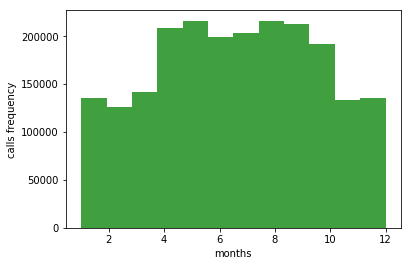

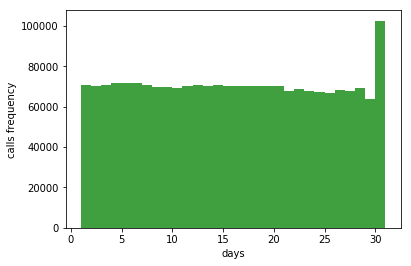

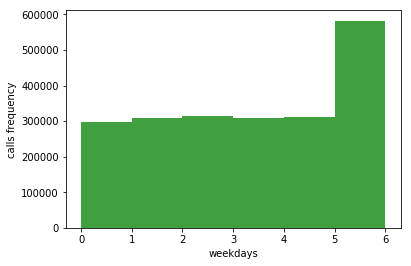

In [212]:
plt.subplot(1,1,1)
plt.hist(df_ser['month_calls'],12,facecolor = 'green',alpha=0.75)
plt.xlabel('months')
plt.ylabel('calls frequency')
plt.show()
plt.hist(df_ser['day_calls'],30,facecolor = 'green',alpha=0.75)
plt.xlabel('days')
plt.ylabel('calls frequency')
plt.show()
plt.hist(df_ser['weekday_calls'],6,facecolor = 'green',alpha=0.75)
plt.xlabel('weekdays')
plt.ylabel('calls frequency')
plt.show()

We can see most of the calls are reported during summer. Moreover, frequency of the calls are more during month end and also during weekends 

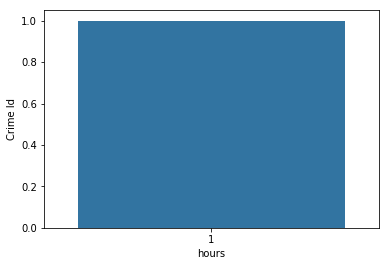

In [206]:
df_ser = pd.DataFrame(df_ser.groupby(['Call Time']).count()).reset_index() 



#plt.hist(df3['Call Time'],24,facecolor = 'Red',alpha = 0.75)
#plt.plot(df3['Call Time'],df3['Crime Id'])
#plt.hist(df3[('Call Time','Crime Id')])


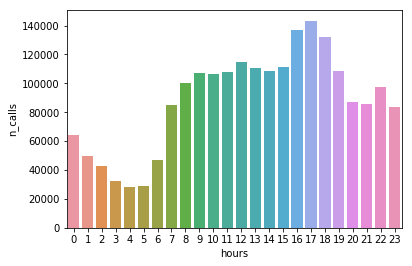

In [215]:
dfg = df_ser.groupby('hours')['n_calls'].sum().reset_index()
ax = sns.barplot('hours', 'n_calls', data=dfg)
plt.show()

We can see most of the calls are between 16:00 to 18:00 and crimes are very low during time 3:00 to 6:00 

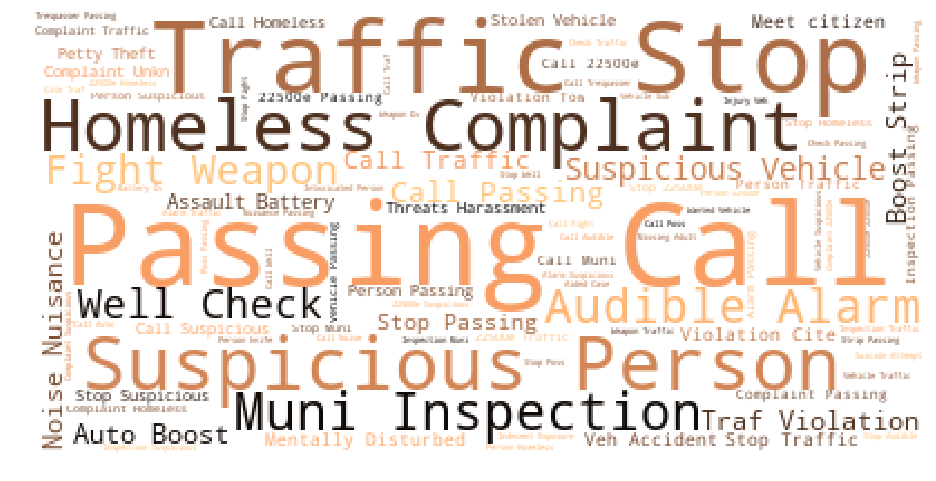

In [11]:
from wordcloud import WordCloud, STOPWORDS
str1 = " ".join(df_ser['Original Crime Type Name'].dropna())
wc =WordCloud(max_words = 1200, stopwords = STOPWORDS, colormap = 'copper', background_color = 'White').generate(str1)
plt.figure(figsize=(16,10))
plt.imshow(wc)
plt.axis('off')
plt.title('');

We can see Majority of crime calls are for Passing Call, Traffic Stop, Homeless Complaint, Susipicious person